In [2]:
!head -n 2601 omicron.csv

id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Business Development Professional,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For ME   2022-02-08:  Covid Insights From Our Analytics Team and USAFacts… https://t.co/j7UBiKk3Em,,smcapplication,0,0,False
1491839660674490371,Gatherer Thompson,Corporate,"I'm with the people who are with everyone. A simple, selfish son. All views hopefully common sense. I like 🌎. Check out the ""Hofeller Documents"" he/him #UBI♿",2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,"@Yascha_Mounk #CDC says number of fully #vaccinated #Omicron patients in #hospital rose from 25% to 40%:
https://t.co/QeU3ZINCuC","['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
1491

In [3]:
!sed -n '2601p' omicron.csv

@mtosterholm @CovidWatch @DrEricDing @EricTopol


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/Anikesh02/Omicron-Sentiment-Analysis/main/omicron.csv")
print(data.head())

                    id          user_name    user_location  \
0  1491840066506743820      Nathan Joyner  Los Angeles, CA   
1  1491839660674490371  Gatherer Thompson        Corporate   
2  1491839607368867842      Nathan Joyner  Los Angeles, CA   
3  1491839207169351689      Nathan Joyner  Los Angeles, CA   
4  1491839165608177667    Brownyard Group    Bay Shore, NY   

                                    user_description         user_created  \
0  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
1  I'm with the people who are with everyone. A s...  2009-05-10 23:01:22   
2  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
3  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
4  We offer liability coverage for the Security G...  2009-12-08 16:41:53   

   user_followers  user_friends  user_favourites  user_verified  \
0              49            11              803          False   
1             639          193

In [5]:
print(data.isnull().sum())

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [6]:
data = data.dropna()

In [9]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


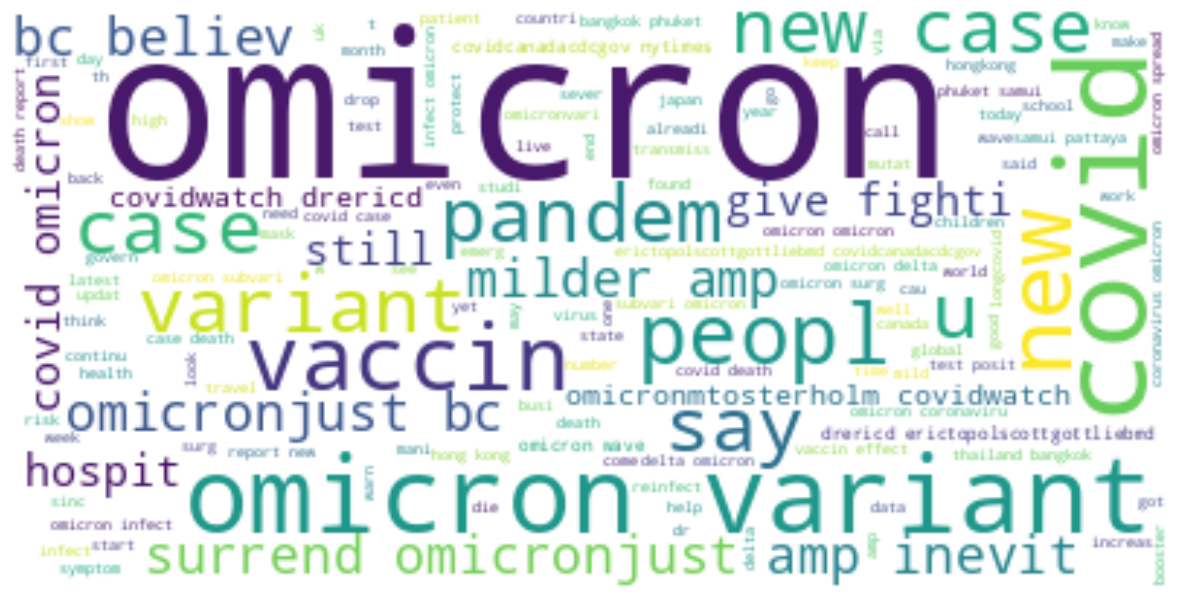

In [10]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

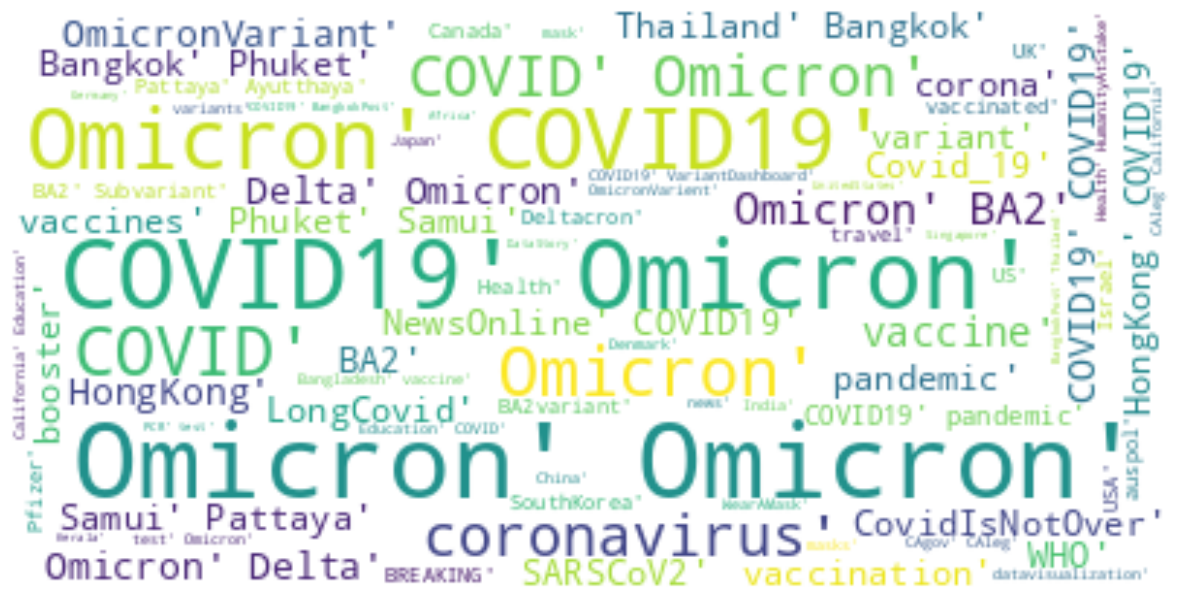

In [11]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                 text  Positive  Negative  \
1   yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
4    winterolymp alreadi underway us olympian look...     0.000       0.0   
5   doctor help discov omicron say pressur reveal ...     0.213       0.0   
8   month tonga final   singl  doubl tappeda sickn...     0.000       0.0   
11  covid pandem continu ukrain case rapid rise du...     0.000       0.0   

    Neutral  
1     0.874  
4     1.000  
5     0.787  
8     1.000  
11    1.000  


In [13]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
